In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np

In [72]:
def to_img(x):
    # Input is from -1 to 1. You sum 1 to make it 0 to 2, then multiply 0.5 
    # to make it from 0 to 1
    x = 0.5 * (x + 1)
    x = np.reshape(x, (-1, 28, 28))
    return x

In [73]:
def display_images(in_, out, n=1):
    
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.numpy())
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.numpy())
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

In [142]:
batch_size = 256
ds = tfds.load('mnist', split='train', as_supervised=True)
mean, std = 0.5, 0.5

def processing_images(data, label):
    # Normalize to be -1 to 1
    data = tf.cast(data, tf.float32) / 255
    data = (data - mean) / (std + 1e-8)
    return data, label
    
dataset = ds.map(processing_images)
dataset = dataset.shuffle(buffer_size=100000).batch(batch_size)

In [143]:
for item in dataset:
    print(tf.math.reduce_min(item[0]), tf.math.reduce_max(item[0]))
    

tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dt

tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dt

In [196]:
class Autoencoder(tf.keras.Model):
    def __init__(self, hidden_dim):
        super().__init__()
        self.encoder = tf.keras.layers.Dense(units = hidden_dim,
                                            input_dim = 28 * 28,
                                            activation='tanh')
        self.decoder = tf.keras.layers.Dense(units = 28 * 28,
                                            activation = 'tanh')
    def call(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [197]:
# Under-complete autoencoders
model = Autoencoder(hidden_dim = 30)
criterion = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)

### 1. Standard Autoencoder (AE)

epoch [1/20], loss:0.2386
epoch [2/20], loss:0.2005
epoch [3/20], loss:0.1664
epoch [4/20], loss:0.1465
epoch [5/20], loss:0.1393
epoch [6/20], loss:0.1164
epoch [7/20], loss:0.1203
epoch [8/20], loss:0.1016
epoch [9/20], loss:0.1003
epoch [10/20], loss:0.0949
epoch [11/20], loss:0.0876
epoch [12/20], loss:0.0900
epoch [13/20], loss:0.0819
epoch [14/20], loss:0.0812
epoch [15/20], loss:0.0828
epoch [16/20], loss:0.0764
epoch [17/20], loss:0.0740
epoch [18/20], loss:0.0660
epoch [19/20], loss:0.0696
epoch [20/20], loss:0.0652


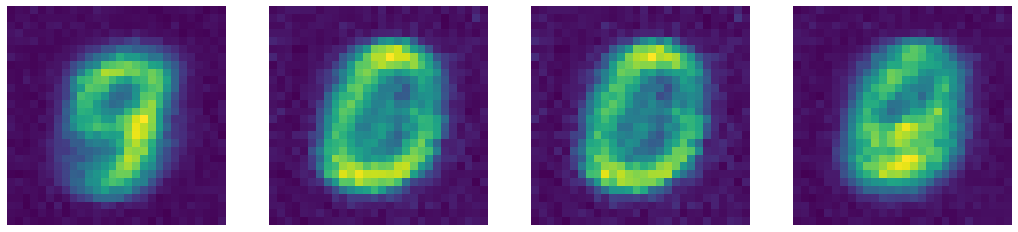

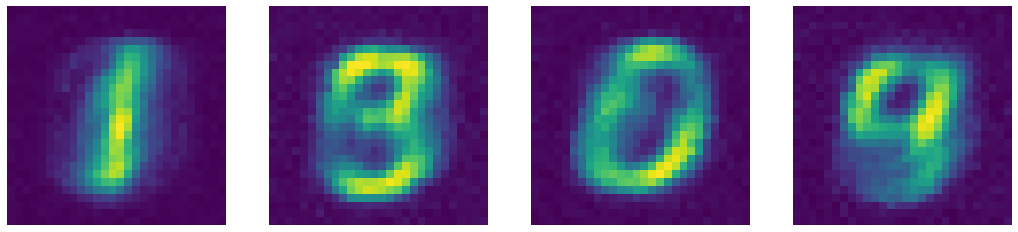

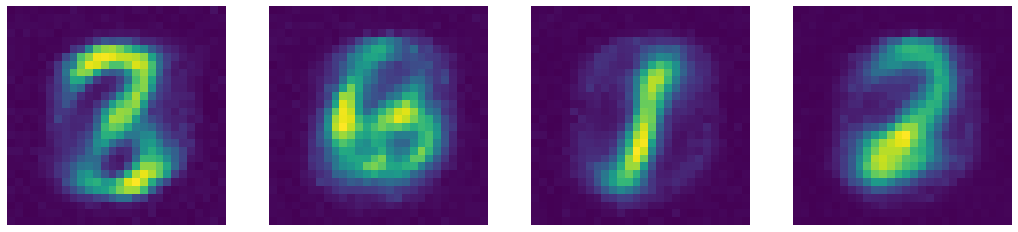

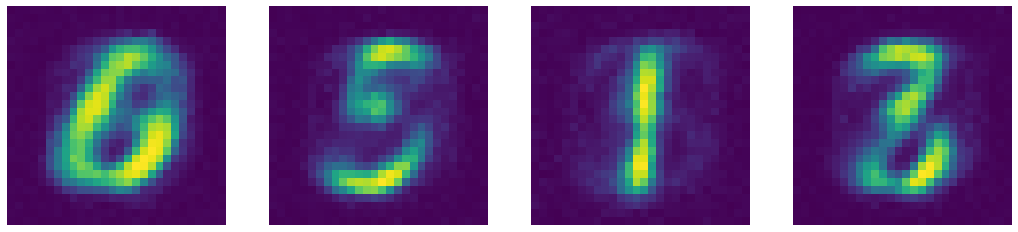

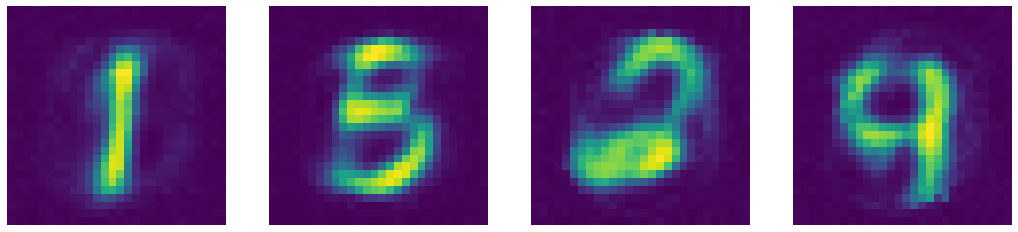

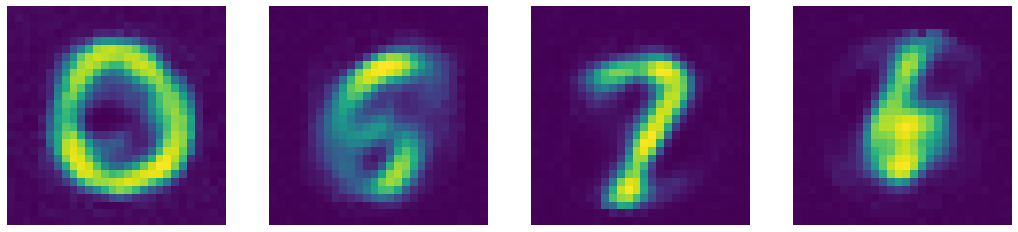

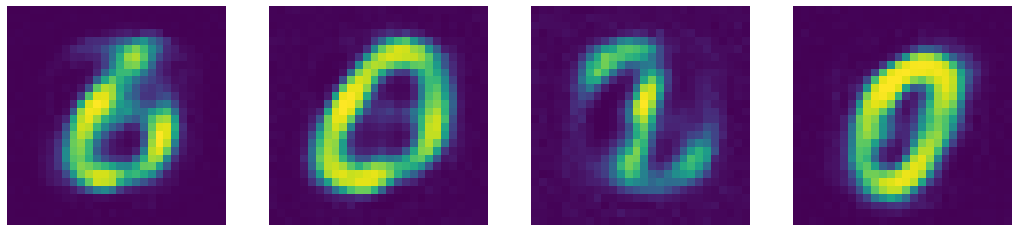

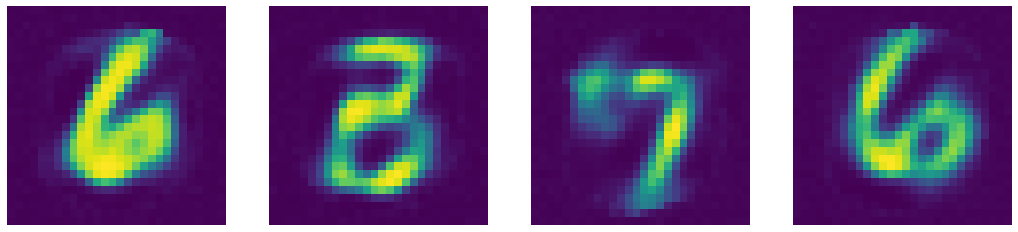

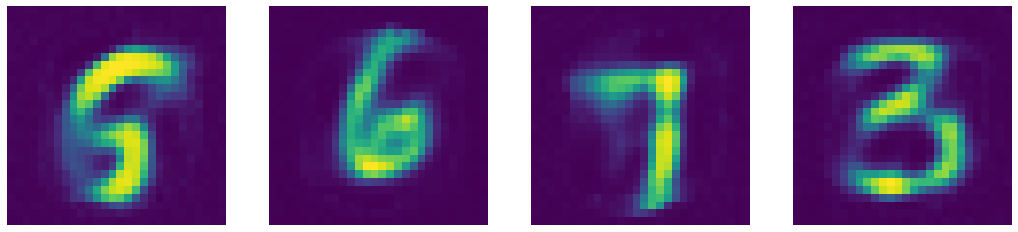

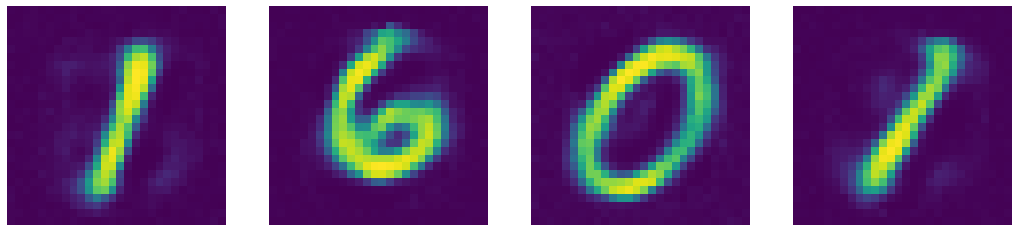

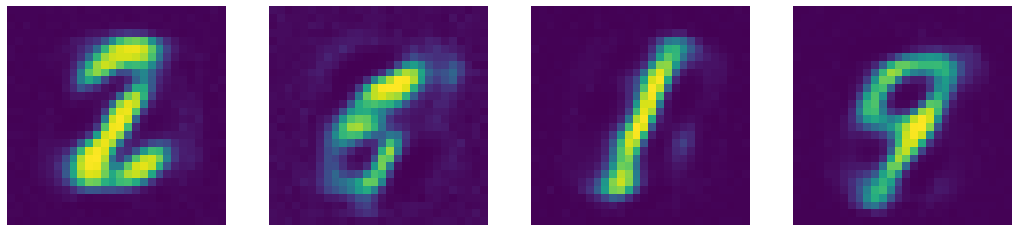

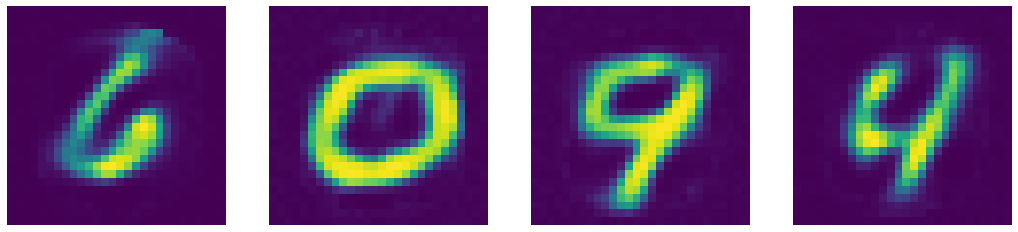

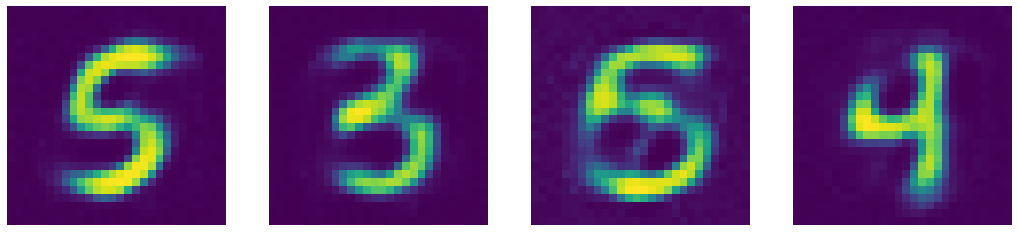

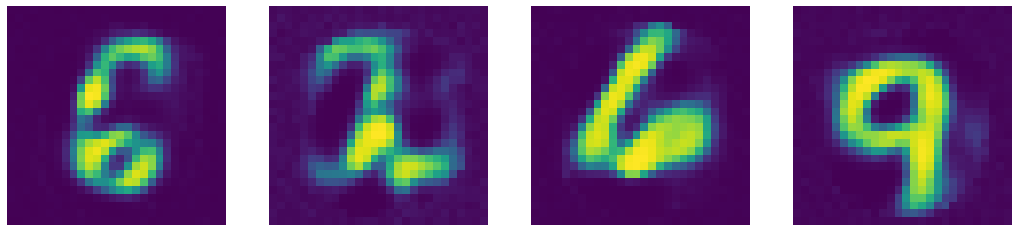

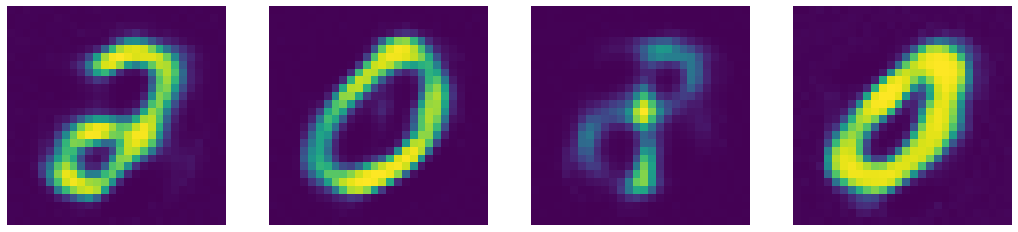

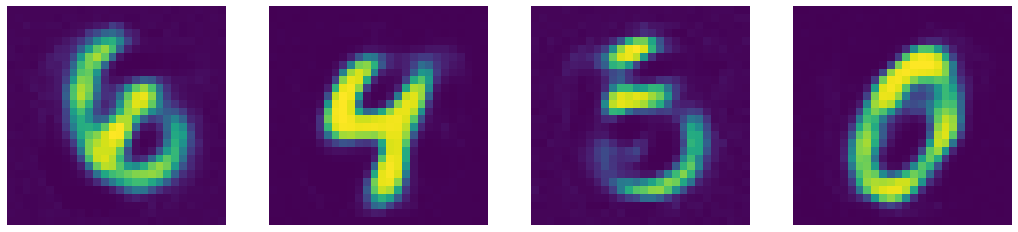

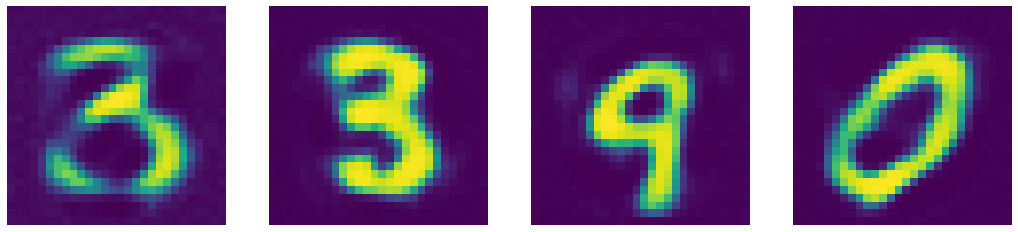

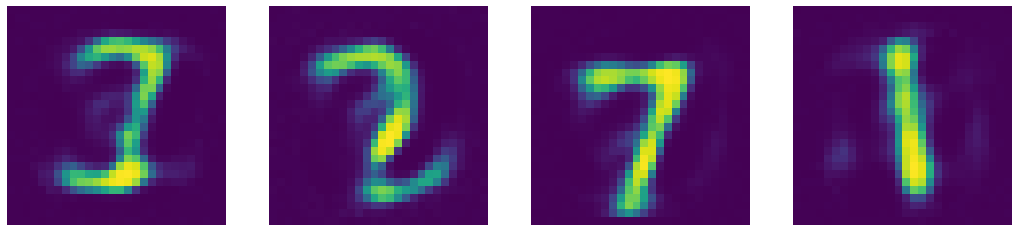

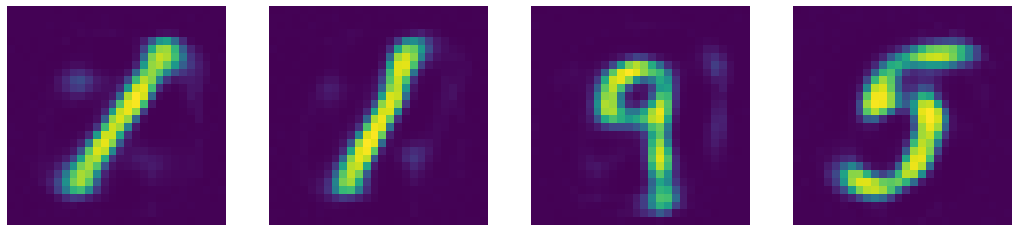

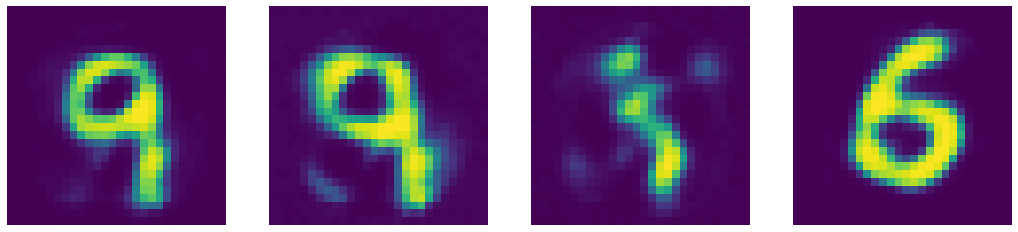

In [198]:
num_epochs = 20
for epoch in range(num_epochs):
    for data, label in dataset:
        data = tf.reshape(data, (data.shape[0], -1))
        #print(data)
        with tf.GradientTape() as tape:
            output = model(data)
            loss = criterion(output, data)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.numpy():.4f}')
    display_images(None, output)

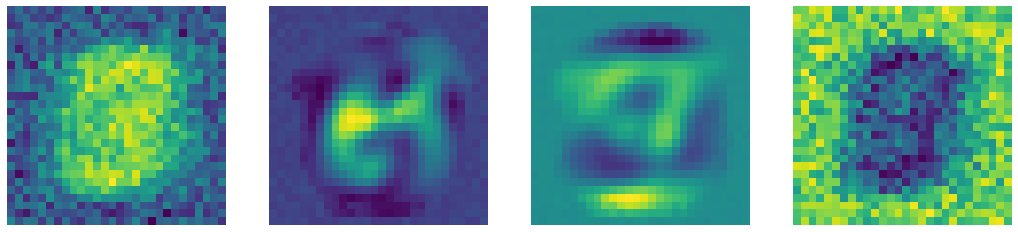

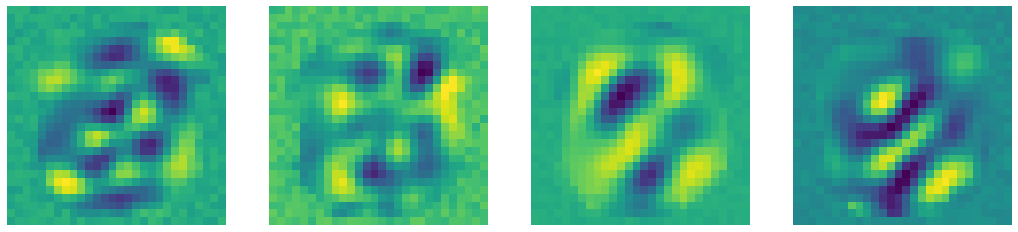

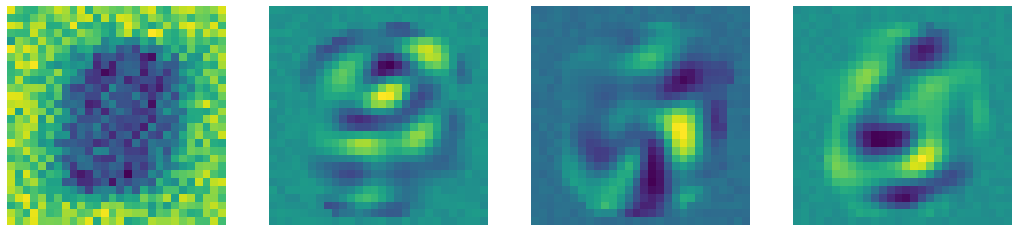

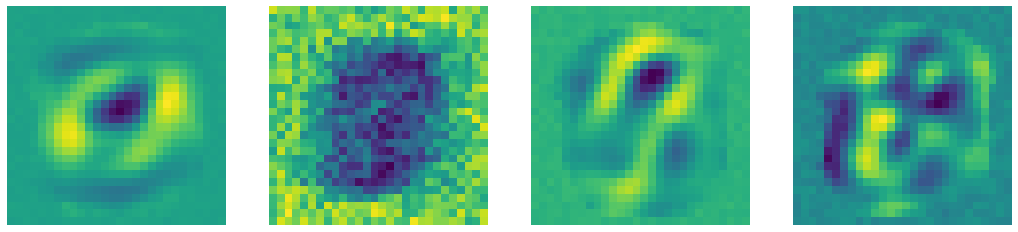

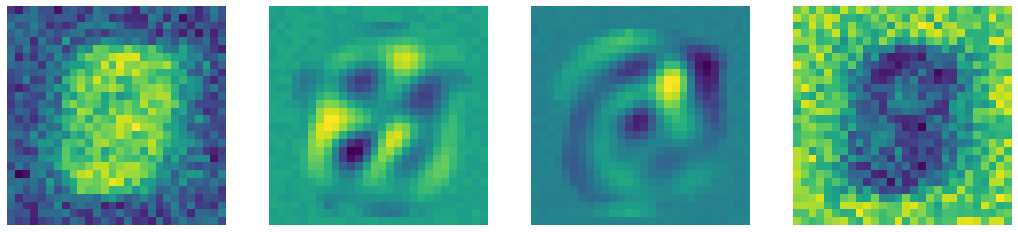

In [201]:
display_images(None, model.decoder.weights[0], 5)

### 2. Denoising Autoencoder (Denoising AE)

In [202]:
# Over-complete autoencoders
model = Autoencoder(hidden_dim = 500)
criterion = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)

epoch [1/20], loss:0.0862
epoch [2/20], loss:0.0675
epoch [3/20], loss:0.0598
epoch [4/20], loss:0.0554
epoch [5/20], loss:0.0516
epoch [6/20], loss:0.0556
epoch [7/20], loss:0.0483
epoch [8/20], loss:0.0471
epoch [9/20], loss:0.0496
epoch [10/20], loss:0.0480
epoch [11/20], loss:0.0448
epoch [12/20], loss:0.0435
epoch [13/20], loss:0.0454
epoch [14/20], loss:0.0433
epoch [15/20], loss:0.0449
epoch [16/20], loss:0.0422
epoch [17/20], loss:0.0451
epoch [18/20], loss:0.0412
epoch [19/20], loss:0.0427
epoch [20/20], loss:0.0434


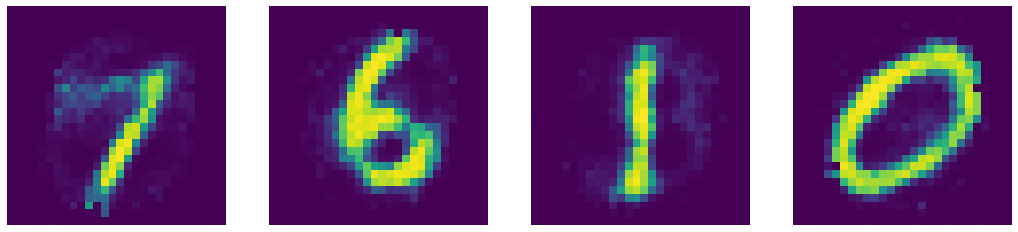

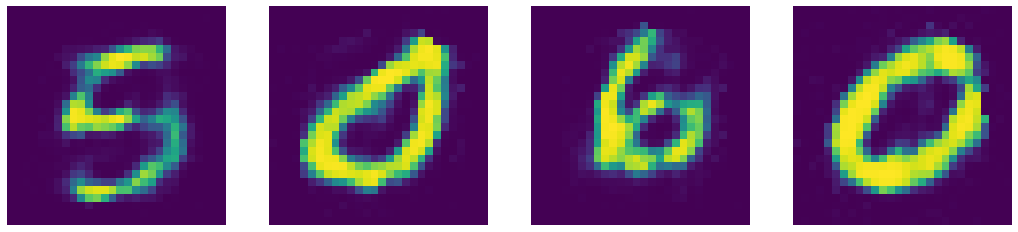

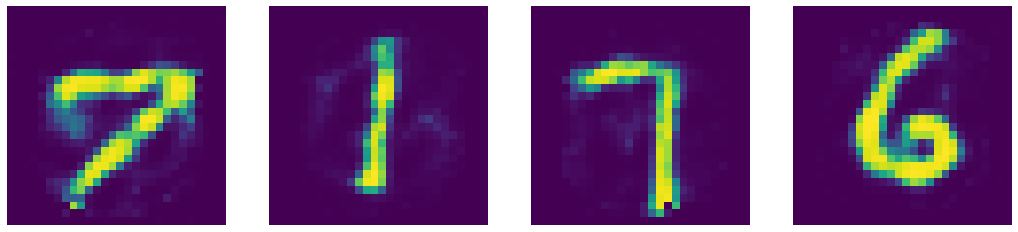

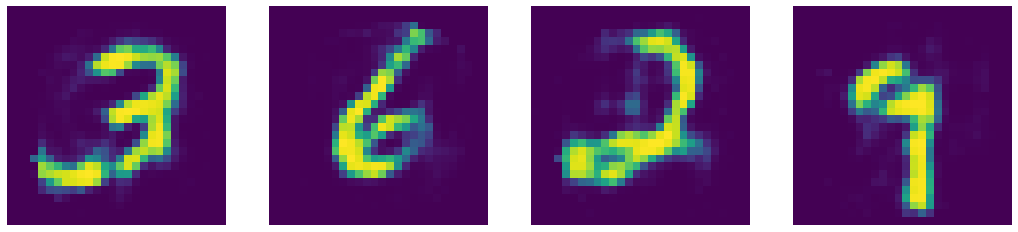

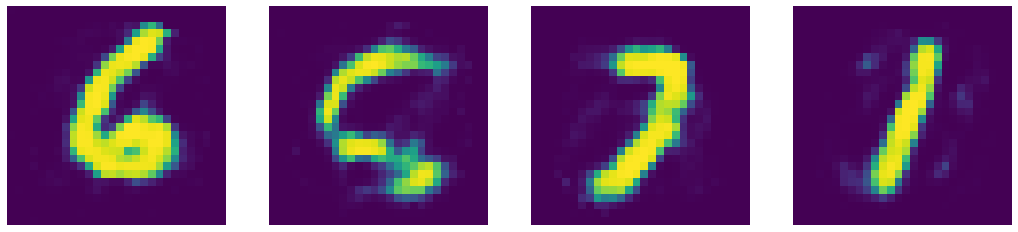

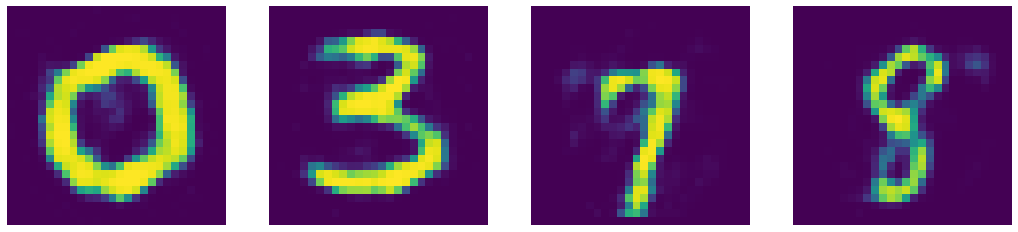

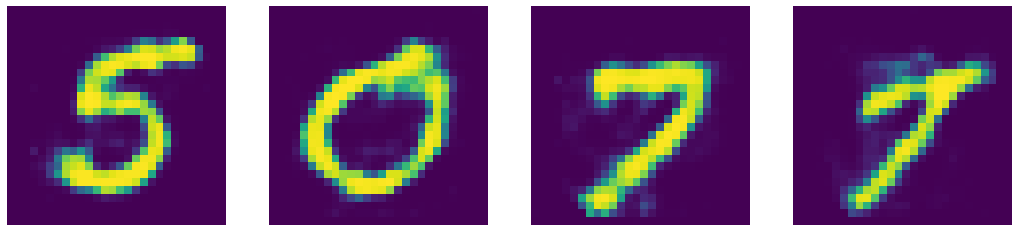

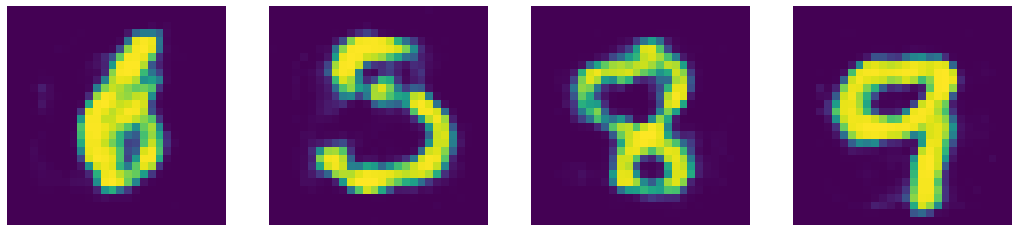

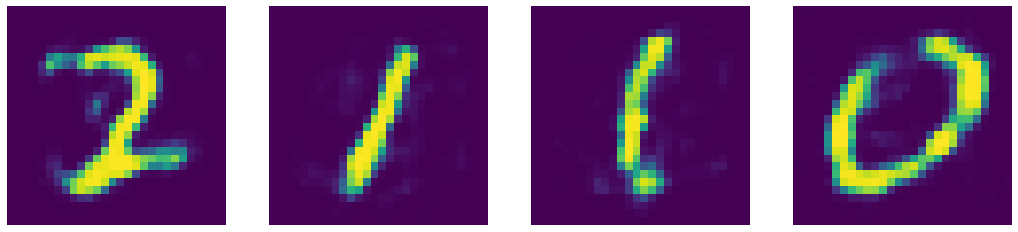

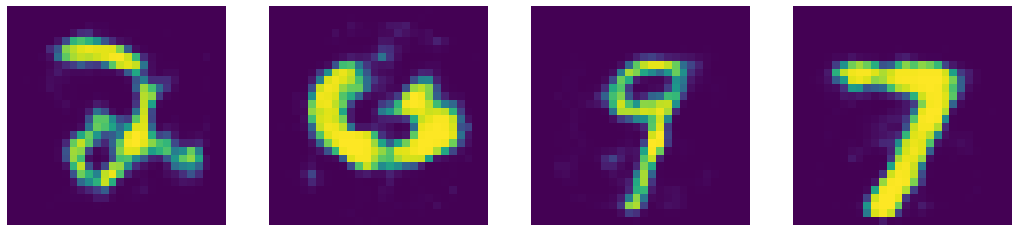

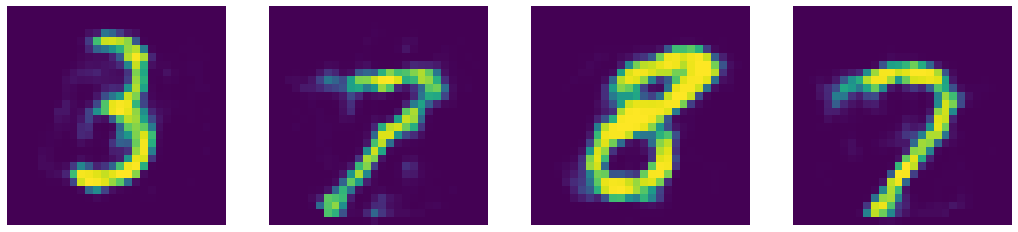

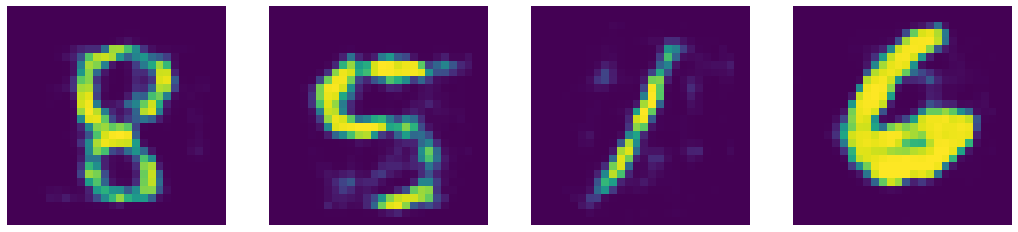

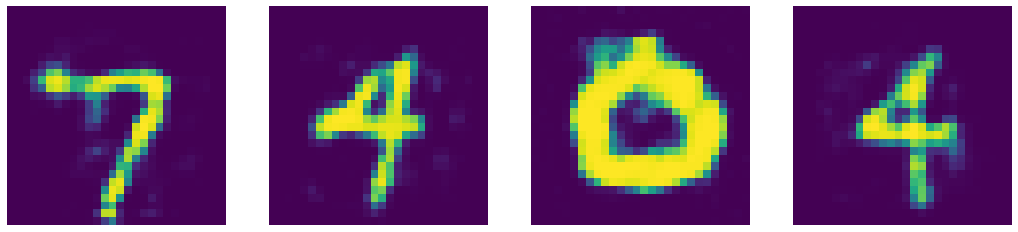

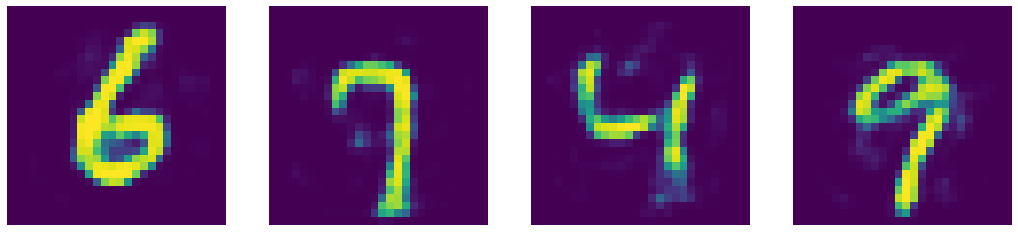

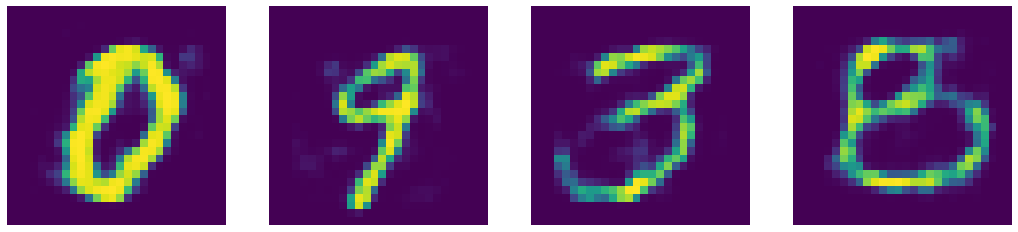

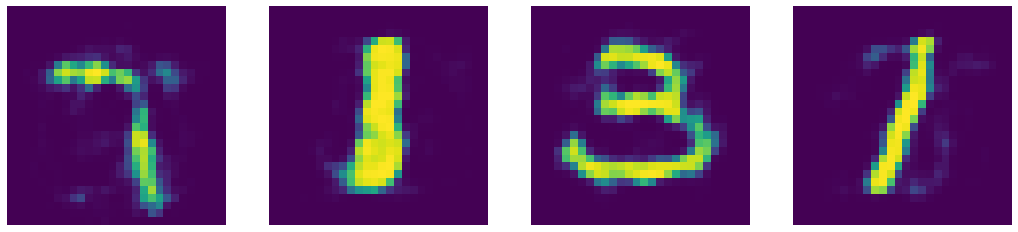

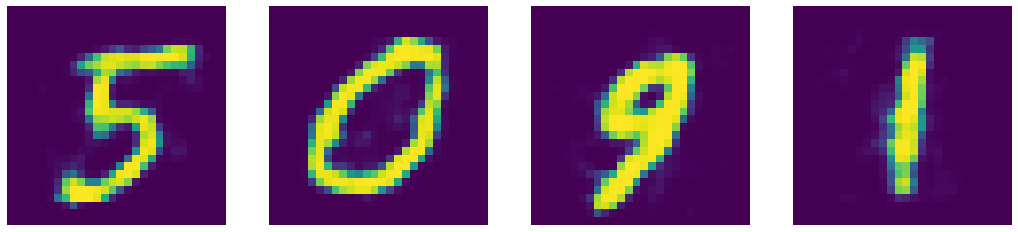

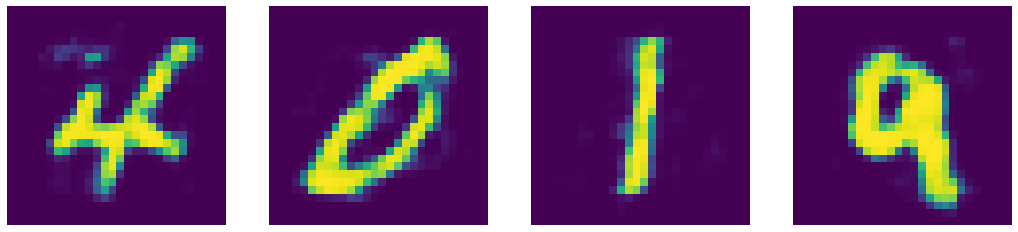

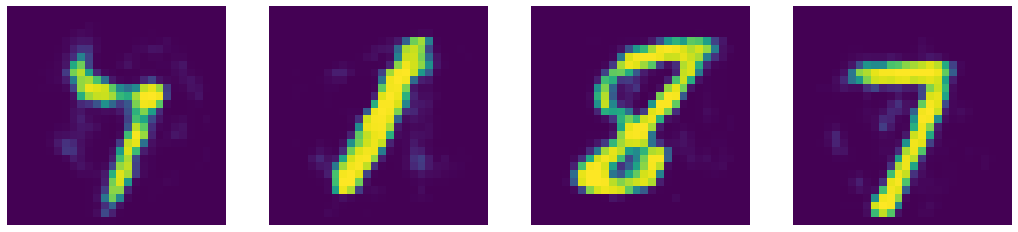

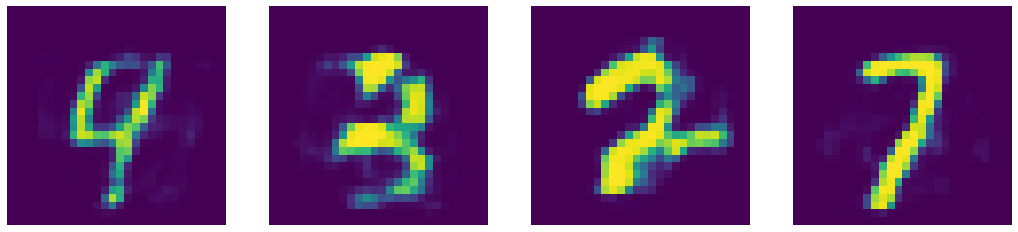

In [203]:
do = tf.keras.layers.Dropout(0.5)
num_epochs = 20
for epoch in range(num_epochs):
    for data, label in dataset:
        data = tf.reshape(data, (data.shape[0], -1))
        noise = do(tf.ones(shape = data.shape), training=True)
        with tf.GradientTape() as tape:
            img_bad = tf.math.multiply(data, noise)
            output = model(img_bad)
            loss = criterion(output, data)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.numpy():.4f}')
    display_images(None, output)

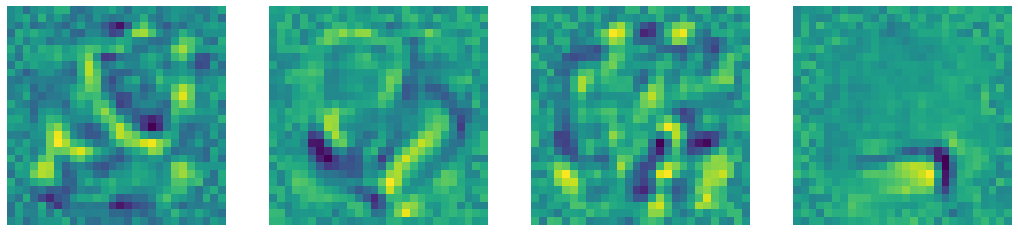

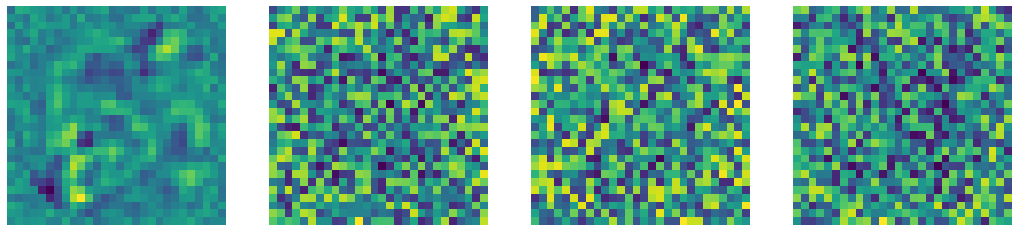

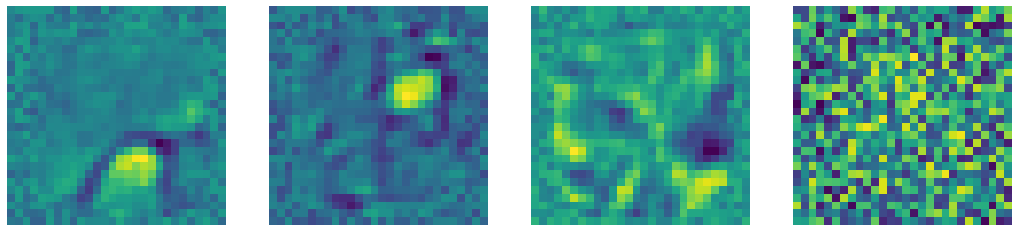

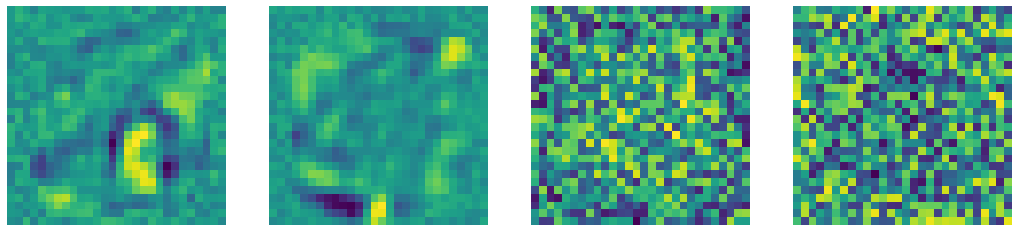

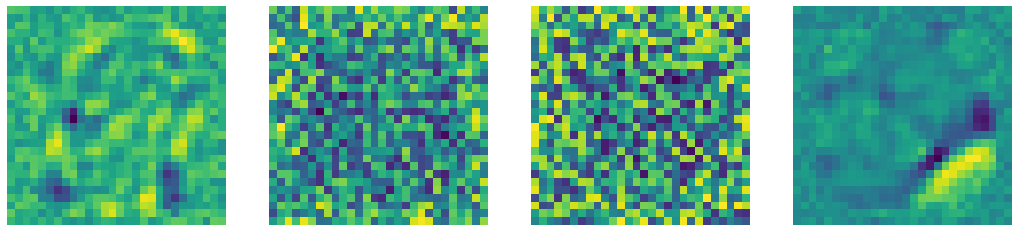

In [204]:
display_images(None, model.decoder.weights[0], 5)
